In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [171]:
df_wine = pd.read_csv("../csv/scraping/wines.csv")

In [12]:
df_review = pd.read_csv("../csv/scraping/reviews.csv")

## Wine

In [14]:
df_wine.head(5)

,code,id,year,name,title,winery,country,type_id,acidity,intensity,sweetness,tannin,price
0,11512302021,1151230,2021,Malbec,Entrada Malbec 2021,Entrada,Argentina,1,2.561932,4.020000,1.696932,2.221363,8.99
1,11949932021,1194993,2021,Cabernet Sauvignon,Santa Julia Cabernet Sauvignon 2021,Santa Julia,Argentina,1,3.099404,3.758206,1.675100,3.585878,8.99
2,13870852019,1387085,2019,Cabernet Sauvignon,Alamos Cabernet Sauvignon 2019,Alamos,Argentina,1,3.076093,3.873418,1.688120,3.447126,9.98
3,12252912020,1225291,2020,Red Blend,Alamos Red Blend 2020,Alamos,Argentina,1,3.458403,3.954693,2.462002,2.921730,9.98
4,15798742021,1579874,2021,Orgánica Cabernet Sauvignon,Santa Julia Orgánica Cabernet Sauvignon 2021,Santa Julia,Argentina,1,3.146355,3.810204,1.465036,3.333861,9.99


In [16]:
df_wine[["year", "acidity", "intensity", "sweetness", "tannin", "price"]].describe()

,year,acidity,intensity,sweetness,tannin,price
count,98288.000000,98288.000000,98288.000000,93188.000000,57799.000000,98288.000000
mean,2222.550912,3.223190,3.298281,1.699616,2.711415,39.879725
std,1269.671260,1.242271,1.332721,0.955822,1.391970,62.626959
min,1811.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2013.000000,3.012364,2.944139,1.476419,2.438370,15.990000
50%,2017.000000,3.393095,3.660670,1.679870,3.139342,23.990000
75%,2019.000000,3.911028,4.048404,2.004385,3.514166,40.990000
max,9999.000000,5.000000,5.000000,5.000000,5.000000,1749.990000


In [21]:
df_wine.describe(include=["object", "category"])

,name,title,winery,country
count,98157,98157,98146,98157
unique,19392,98126,10838,52
top,Cabernet Sauvignon,Nine Stones Shiraz 2016,Penfolds,France
freq,2564,3,370,18176


### 결측치 처리

<Axes: >

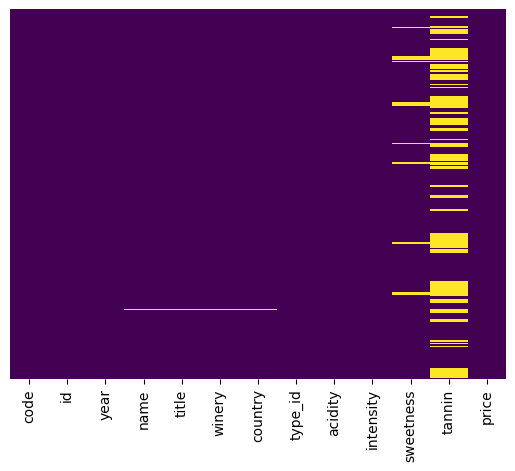

In [29]:
sns.heatmap(df_wine.isna(), yticklabels=False, cbar=False, cmap="viridis")

<Axes: >

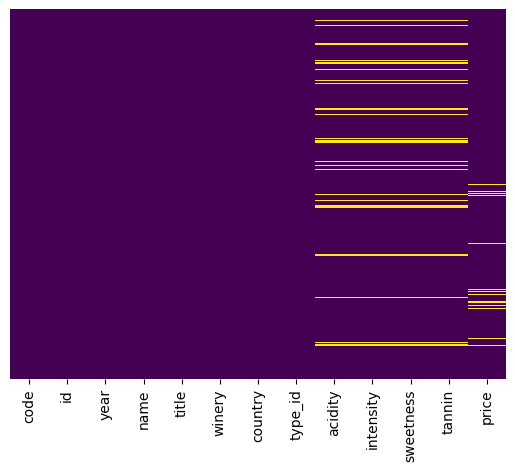

In [116]:
sns.heatmap(df_wine==-1, yticklabels=False, cbar=False, cmap="viridis")

#### name, title, winery, country

In [57]:
def fill_na_ntwc(row):
    wine = df_wine.loc[df_wine["id"]==row["id"], :].drop_duplicates("id").iloc[0, :]
    df_wine.loc[row.name, "name"] = wine["name"]
    df_wine.loc[row.name, "title"] = wine["title"]
    df_wine.loc[row.name, "winery"] = wine["winery"]
    df_wine.loc[row.name, "country"] = wine["country"]
    df_wine.loc[row.name, "type_id"] = wine["type_id"]
    df_wine.loc[row.name, "price"] = wine["price"]

In [172]:
df_wine.loc[df_wine["name"].isna(), :].apply(fill_na_ntwc, axis=1)

45445    None
49568    None
49569    None
49570    None
59493    None
         ... 
97800    None
97801    None
97802    None
97806    None
97860    None
Length: 131, dtype: object

In [142]:
for c in df_wine.columns:
    print(c, df_wine[c].isna().any(), (df_wine[c]==-1).any())

code False False
id False False
year False False
name False False
title False False
winery False False
country False False
type_id False False
acidity False True
intensity False True
sweetness True True
tannin True True
price False True


#### winery

In [173]:
df_wine.loc[df_wine["winery"].isna(), :]

,code,id,year,name,title,winery,country,type_id,acidity,intensity,sweetness,tannin,price
537,42056882021,4205688,2021,Ataliva Malbec Mendoza,Ataliva Malbec Mendoza 2021,NaN,Argentina,1,2.715000,4.000000,2.184500,2.223500,9.980000
5999,13194812021,1319481,2021,Domaine Wachau Grüner Veltliner,Domaine Wachau Grüner Veltliner 2021,NaN,Austria,2,4.075145,2.063402,1.122614,NaN,24.990000
13102,20341442007,2034144,2007,Le Mesnil Champagne Prestige Brut Blanc De Bla...,Le Mesnil Champagne Prestige Brut Blanc De Bla...,NaN,France,3,4.952809,4.433708,NaN,NaN,183.333333
17328,7356052020,735605,2020,Riesling,Riesling 2020,NaN,Germany,2,4.592059,3.140785,1.403529,NaN,30.000000
18164,7356052019,735605,2019,Riesling,Riesling 2019,NaN,Germany,2,4.592059,3.140785,1.403529,NaN,33.000000
18562,14268842018,1426884,2018,Dr. Von Bassermann-Jordan Pfalz Pechstein,Dr. Von Bassermann-Jordan Pfalz Pechstein 2018,NaN,Germany,2,4.458302,3.354906,2.002453,NaN,145.000000
26558,22133322019,2213332,2019,Cosmopolitan Diva,Cosmopolitan Diva 2019,NaN,Latvia,1,-1.000000,-1.000000,-1.000000,-1.000000,45.000000
33414,30781032018,3078103,2018,El Pajaro Rojo,El Pajaro Rojo 2018,NaN,Spain,1,3.456726,3.306195,1.658761,3.122301,18.990000
40829,58872352016,5887235,2016,Delaware,Delaware 2016,NaN,United States,3,-1.000000,-1.000000,-1.000000,-1.000000,38.000000
41093,58872352017,5887235,2017,Delaware,Delaware 2017,NaN,United States,3,-1.000000,-1.000000,-1.000000,-1.000000,28.000000


In [174]:
df_wine = df_wine.loc[df_wine["winery"].isna()==False, :]

#### acidity, intensity

In [175]:
df_wine.loc[df_wine["acidity"]==-1, :]

,code,id,year,name,title,winery,country,type_id,acidity,intensity,sweetness,tannin,price
145,69360462020,6936046,2020,Sobrenatural Tinto,Chakana Sobrenatural Tinto 2020,Chakana,Argentina,1,-1.0,-1.0,-1.0,-1.0,16.99
155,55450982019,5545098,2019,Cielo Rojo Red Blend,Bodini Cielo Rojo Red Blend 2019,Bodini,Argentina,1,-1.0,-1.0,-1.0,-1.0,16.99
218,61407632019,6140763,2019,Belinda,Capítulo 7 Belinda 2019,Capítulo 7,Argentina,1,-1.0,-1.0,-1.0,-1.0,19.99
219,66348822019,6634882,2019,Clos 1100 Tinto,Baron Edmond de Rothschild Clos 1100 Tinto 2019,Baron Edmond de Rothschild,Argentina,1,-1.0,-1.0,-1.0,-1.0,19.99
273,40183322020,4018332,2020,Garnacha,Ver Sacrum Garnacha 2020,Ver Sacrum,Argentina,1,-1.0,-1.0,-1.0,-1.0,21.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98283,21356872018,2135687,2018,Estate Pinot Rosé de Corte (Varietales),Bodega Garzón Estate Pinot Rosé de Corte (Vari...,Bodega Garzón,Uruguay,4,-1.0,-1.0,-1.0,-1.0,15.95
98284,21356872016,2135687,2016,Estate Pinot Rosé de Corte (Varietales),Bodega Garzón Estate Pinot Rosé de Corte (Vari...,Bodega Garzón,Uruguay,4,-1.0,-1.0,-1.0,-1.0,15.95
98285,21356872017,2135687,2017,Estate Pinot Rosé de Corte (Varietales),Bodega Garzón Estate Pinot Rosé de Corte (Vari...,Bodega Garzón,Uruguay,4,-1.0,-1.0,-1.0,-1.0,15.95
98286,21356872014,2135687,2014,Estate Pinot Rosé de Corte (Varietales),Bodega Garzón Estate Pinot Rosé de Corte (Vari...,Bodega Garzón,Uruguay,4,-1.0,-1.0,-1.0,-1.0,15.95


In [149]:
# -1인 id중 다른 빈티지에 -1이 있는 경우

for id in df_wine.loc[df_wine["acidity"]==-1, "id"]:
    if (df_wine.loc[df_wine["id"]==id, "acidity"]!=-1).any()==True:
        print(id)

2316699
2316699
5443362
1142391
1469857
1106262
1084034
4303064
16456
16456
16456
1594422
1660924
1706698
1164821
1706698
2316699
1212227
1382942
1706698
4903571
1084034
2316699
1084034
66504
1144447
82751
5443362
17444
1706698
6319961
1700406
1254
1084093
13391
13391
2150084
1084034
1660924
2037212
1660924
738481
17444
3246310
16456
1084093
82751
2316699
1469857
2716700
1157059
2287143
1536111
3388793
1301296
1537018
4896226
4896226
7138255
7138255
1162522
3388793
1537018
2716700
1554423
1537018
1301296
1554423
2250439
1282049
7138255
2716700
2716700
1421622
1421622


In [150]:
df_wine.loc[df_wine["id"]==1421622, :]

,code,id,year,name,title,winery,country,type_id,acidity,intensity,sweetness,tannin,price
27466,14216222015,1421622,2015,Riesling,Spy Valley Riesling 2015,Spy Valley,New Zealand,2,4.401282,2.582868,1.61825,NaN,13.6
27675,14216222016,1421622,2016,Riesling,Spy Valley Riesling 2016,Spy Valley,New Zealand,2,4.401282,2.582868,1.61825,NaN,22.0
77614,14216222014,1421622,2014,Riesling,Spy Valley Riesling 2015,Spy Valley,New Zealand,2,-1.000000,-1.000000,-1.00000,-1.0,13.6
77615,14216222013,1421622,2013,Riesling,Spy Valley Riesling 2015,Spy Valley,New Zealand,2,-1.000000,-1.000000,-1.00000,-1.0,13.6


In [176]:
# 있는 경우는 기존 값 대치

for i, r in df_wine.loc[df_wine["acidity"]==-1, :].iterrows():
    if (df_wine.loc[df_wine["id"]==r["id"], "acidity"]!=-1).any()==True:
        _row = df_wine.loc[(df_wine["acidity"]!=-1)&(df_wine["id"]==r["id"]), :].drop_duplicates("id").iloc[0, :]
        df_wine.loc[i, "acidity"] = _row["acidity"]
        df_wine.loc[i, "intensity"] = _row["intensity"]
        df_wine.loc[i, "sweetness"] = _row["sweetness"]
        df_wine.loc[i, "tannin"] = _row["tannin"]

In [177]:
# 나머지는 국가, 타입 별 평균으로 대치
# 국가, 타입 별 평균이 없을 시 해당 값은 타입 별 평균으로 대치

avg_ai1 = df_wine.loc[df_wine["acidity"]!=-1, :][["country", "type_id", "acidity", "intensity", "sweetness", "tannin"]].groupby(["country", "type_id"]).mean()
avg_ai2 = df_wine.loc[df_wine["acidity"]!=-1, :][["type_id", "acidity", "intensity", "sweetness", "tannin"]].groupby("type_id").mean()

In [178]:
for i, r in df_wine.loc[df_wine["acidity"]==-1, :].iterrows():
    try:
        _row = avg_ai1.loc[(r["country"], r["type_id"]), :]
        df_wine.loc[i, "acidity"] = _row["acidity"]
        df_wine.loc[i, "intensity"] = _row["intensity"]
        df_wine.loc[i, "sweetness"] = _row["sweetness"]
        df_wine.loc[i, "tannin"] = _row["tannin"]
    except Exception as e:
        _row = avg_ai2.loc[r["type_id"]]
        df_wine.loc[i, "acidity"] = _row["acidity"]
        df_wine.loc[i, "intensity"] = _row["intensity"]
        df_wine.loc[i, "sweetness"] = _row["sweetness"]
        df_wine.loc[i, "tannin"] = _row["tannin"]

In [181]:
for c in df_wine.columns:
    print(c, df_wine[c].isna().any(), (df_wine[c]==-1).any())

code False False
id False False
year False False
name False False
title False False
winery False False
country False False
type_id False False
acidity False False
intensity False False
sweetness True False
tannin True False
price False True


#### sweetness

In [182]:
df_wine.sweetness.isna().value_counts()

sweetness
False    92796
True      5481
Name: count, dtype: int64

In [183]:
df_swt = df_wine[["type_id", "sweetness"]]
df_swt["sweetness"] = df_swt["sweetness"].isna()

C:\Users\peep1\AppData\Local\Temp\ipykernel_12736\311337085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_swt["sweetness"] = df_swt["sweetness"].isna()


In [184]:
df_swt.groupby("type_id").value_counts()

# 3번 타입의 와인만이 sweetness에서 결측치를 보인다

type_id  sweetness
1        False        53400
2        False        29564
3        True          5481
         False          227
4        False         5461
7        False         2308
24       False         1836
Name: count, dtype: int64

In [185]:
len(df_wine.loc[(df_wine["type_id"]==3)&(df_wine["sweetness"].isna()), "id"].unique())

3064

In [186]:
len(df_wine.loc[(df_wine["type_id"]==3)&(df_wine["sweetness"].isna()==False)&(df_wine["sweetness"]!=-1), "id"].unique())

125

In [ ]:
# 동일한 id에 sweetness를 대치하는 방법을 고려했으나 고유 id 갯수의 차이로 보아 어려울 것으로 판단
# 3번 타입의 sweetness 평균을 대치하기로 함

In [187]:
avg_swt = df_wine.loc[(df_wine["type_id"]==3)&(df_wine["sweetness"].isna()==False)&(df_wine["sweetness"]!=-1), "sweetness"].mean()
df_wine.loc[df_wine["sweetness"].isna(), "sweetness"] = avg_swt
df_wine.loc[df_wine["sweetness"]==-1, "sweetness"] = avg_swt

#### tannin

In [188]:
df_wine.drop(labels=["tannin"], axis=1, inplace=True)

In [189]:
for c in df_wine.columns:
    print(c, df_wine[c].isna().any(), (df_wine[c]==-1).any())

code False False
id False False
year False False
name False False
title False False
winery False False
country False False
type_id False False
acidity False False
intensity False False
sweetness False False
price False True


#### price

In [191]:
df_wine.loc[df_wine["price"]==-1, :].head()

,code,id,year,name,title,winery,country,type_id,acidity,intensity,sweetness,price
42757,165112018,16511,2018,Trumpeter Malbec,Rutini Trumpeter Malbec 2018,Rutini,Argentina,1,2.798878,3.626018,2.126644,-1.0
42758,165112020,16511,2020,Trumpeter Malbec,Rutini Trumpeter Malbec 2020,Rutini,Argentina,1,2.798878,3.626018,2.126644,-1.0
42759,165112021,16511,2021,Trumpeter Malbec,Rutini Trumpeter Malbec 2021,Rutini,Argentina,1,2.798878,3.626018,2.126644,-1.0
42760,165112017,16511,2017,Trumpeter Malbec,Rutini Trumpeter Malbec 2017,Rutini,Argentina,1,2.798878,3.626018,2.126644,-1.0
42761,165112016,16511,2016,Trumpeter Malbec,Rutini Trumpeter Malbec 2016,Rutini,Argentina,1,2.798878,3.626018,2.126644,-1.0


In [193]:
df_wine.loc[df_wine["id"]==16511, :].head()

,code,id,year,name,title,winery,country,type_id,acidity,intensity,sweetness,price
13,165112019,16511,2019,Trumpeter Malbec,Rutini Trumpeter Malbec 2019,Rutini,Argentina,1,2.798461,3.626787,2.126302,10.99
42757,165112018,16511,2018,Trumpeter Malbec,Rutini Trumpeter Malbec 2018,Rutini,Argentina,1,2.798878,3.626018,2.126644,-1.00
42758,165112020,16511,2020,Trumpeter Malbec,Rutini Trumpeter Malbec 2020,Rutini,Argentina,1,2.798878,3.626018,2.126644,-1.00
42759,165112021,16511,2021,Trumpeter Malbec,Rutini Trumpeter Malbec 2021,Rutini,Argentina,1,2.798878,3.626018,2.126644,-1.00
42760,165112017,16511,2017,Trumpeter Malbec,Rutini Trumpeter Malbec 2017,Rutini,Argentina,1,2.798878,3.626018,2.126644,-1.00


In [ ]:
# 동일 id에 있는 경우 대치

In [222]:
def fill_na_p(row):
    _row = df_wine.loc[(df_wine["price"]!=-1)&(df_wine["id"]==row["id"]), :]
    if _row["id"].any()==True:
        df_wine.loc[row.name, "price"] = _row.drop_duplicates("id").iloc[0, :]["price"]
    else:
        df_wine.loc[row.name, "price"] = df_wine.loc[(df_wine["country"]==row["country"]), :].drop_duplicates("id")["price"].mean()

In [223]:
df_wine.loc[df_wine["price"]==-1, :].apply(fill_na_p, axis=1)

42757    None
42758    None
42759    None
42760    None
42761    None
         ... 
98276    None
98277    None
98278    None
98279    None
98280    None
Length: 4151, dtype: object

In [224]:
for c in df_wine.columns:
    print(c, df_wine[c].isna().any(), (df_wine[c]==-1).any())

code False False
id False False
year False False
name False False
title False False
winery False False
country False False
type_id False False
acidity False False
intensity False False
sweetness False False
price False False


In [236]:
df_wine.head()

,code,id,year,name,title,winery,country,type_id,acidity,intensity,sweetness,price
0,11949932021,1194993,2021,Cabernet Sauvignon,Santa Julia Cabernet Sauvignon 2021,Santa Julia,Argentina,1,3.099404,3.758206,1.675100,8.99
1,13870852019,1387085,2019,Cabernet Sauvignon,Alamos Cabernet Sauvignon 2019,Alamos,Argentina,1,3.076093,3.873418,1.688120,9.98
2,12252912020,1225291,2020,Red Blend,Alamos Red Blend 2020,Alamos,Argentina,1,3.458403,3.954693,2.462002,9.98
3,27379772020,2737977,2020,Barrel Select Malbec,Bodega Finca Las Moras Barrel Select Malbec 2020,Bodega Finca Las Moras,Argentina,1,2.711085,3.777112,2.096361,9.99
4,24038652019,2403865,2019,Malbec Blend,Que Guapo Malbec Blend 2019,Que Guapo,Argentina,1,3.413980,4.138696,2.533411,9.99


## Review

In [230]:
for c in df_review.columns:
    print(df_review[c].isna().any(), (df_review[c]==-1).any())

False False
False False
False False
False False
False False


### 데이터프레임 통합

In [231]:
df_review = df_review.loc[df_review["code"].isin(df_wine.code.unique()), :]

In [232]:
df_wine = df_wine.loc[df_wine["code"].isin(df_review.code.unique()), :]

In [233]:
print(len(df_review.code.unique()), len(df_wine))

68597 68597


In [235]:
df_wine.reset_index(drop=True, inplace=True)
df_review.reset_index(drop=True, inplace=True)

In [249]:
df_wine = df_wine.merge(df_review.code.value_counts().to_frame().reset_index(), how="left", on="code")

In [252]:
df_wine = df_wine.merge(df_review[["code", "user_rating"]].groupby("code").mean().reset_index(), how="left", on="code")

In [10]:
df_wine.to_csv("../csv/eda/wines.csv", index=False)
df_review.to_csv("../csv/eda/reviews.csv", index=False)